In [153]:
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
# put parent dir in path
sys.path.insert(0,'..')

## Get Path Info

In [155]:
# get exp num
while True:
    try:
        exp_num = int(input())
        break
    except ValueError:
        print("Must be an integer")

metrics_path = os.path.join("..", "model_metrics", "exp" + str(exp_num))

1


## Train Metrics

In [156]:
scores = np.load(os.path.join(metrics_path, "train_scores.npy"), allow_pickle=True)
auc = np.load(os.path.join(metrics_path, "train_auc_all.npy"), allow_pickle=True)
fpr = np.load(os.path.join(metrics_path, "train_fpr_all.npy"), allow_pickle=True)
tpr = np.load(os.path.join(metrics_path, "train_tpr_all.npy"), allow_pickle=True)
thresh = np.load(os.path.join(metrics_path, "train_thresholds_all.npy"), allow_pickle=True)

In [158]:
# get thresh to reindex by
thresh_lens = np.array([i.shape[0] for i in thresh])
rein_thresh = thresh[np.argmax(thresh_lens)]

# reindex all these values so we are using the same thresholds
for i in range(thresh.shape[0]):
    df = pd.DataFrame(columns=['fpr', 'tpr', 'thresh'])
    df['fpr'] = fpr[i]
    df['tpr'] = tpr[i]
    df['thresh'] = thresh[i]

    df = df.set_index('thresh').reindex(index=rein_thresh, method='nearest').reset_index()
    fpr[i] = df['fpr'][:, None]
    tpr[i] = df['tpr'][:, None]
    thresh[i] = df['thresh'][:, None]

fpr = np.hstack(fpr).T
tpr = np.hstack(tpr).T
thresh = np.hstack(thresh).T

In [178]:
# get theta*
best_thresh_inds = np.argmax(np.square(tpr) + np.square(1 - fpr), axis=1)
best_threshs = thresh[np.arange(10), best_thresh_inds]

# get sens/spec
sens = 1 - fpr[np.arange(10), best_thresh_inds]
spec = tpr[np.arange(10), best_thresh_inds]

<Figure size 432x288 with 0 Axes>

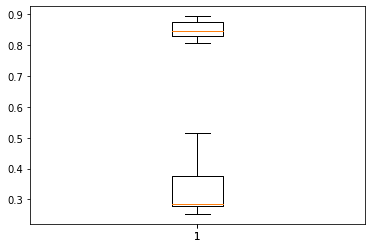

<Figure size 432x288 with 0 Axes>

In [182]:
# generate plots
plt.boxplot(best_threshs)
plt.boxplot(sens)
#plt.boxplot(spec)
#plt.boxplot(scores)
plt.figure()

NameError: name 'data' is not defined

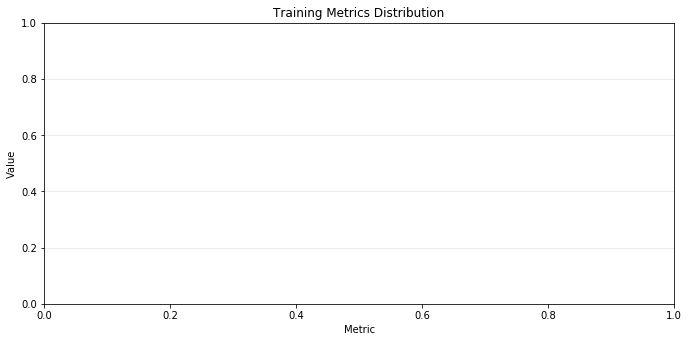

In [186]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('Boxplots')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Training Metrics Distribution')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
    
box = bp['boxes'][i]
boxX = []
boxY = []

box_coords = np.column_stack([boxX, boxY])
# Alternate between Dark Khaki and Royal Blue
ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
# Now draw the median lines back over what we just filled in
med = bp['medians'][i]
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    ax1.plot(medianX, medianY, 'k')
    
medians[i] = medianY[0]
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
    color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(random_dists, 2),
                    rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'{N} Random Numbers',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'IID Bootstrap Resample',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

plt.show()

In [187]:
pd.read_csv("../data/loaded/processed/medication_processed.csv")

,patientunitstayid,0,2,5,14,19,36,38,41,44,56,59,65,71,80,83,92,95,99
0,172448,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,242714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,243176,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,245210,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,247522,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,3348450,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
775,3350651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
776,3350835,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
777,3351268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
